In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. Below, I will construct a simple linear regression model for the response variable mpg with horsepower as the feature and mpg as the response.  I will report the estimated regression model in the form $Y = \alpha + \beta x$. 


In [4]:
dfAuto = pd.read_csv("data/auto.csv")
dfAuto.head()

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0


In [5]:
bhat, ahat, rval, pval, stderr = stats.linregress(dfAuto["horsepower"], dfAuto["mpg"])

In [6]:
print("Y =  {:.2f}" .format(ahat), " + {:.2f}x" .format(bhat))

Y =  39.94  + -0.16x


Now, I will make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 

In [7]:
def plot_line_noisy(var=1,alpha=ahat,beta=bhat,n_points=25):
    noise_x = dfAuto["horsepower"]
    noise_y = dfAuto["mpg"]
    fig, ax = plt.subplots(figsize=(12,6))
    x = np.arange(dfAuto["horsepower"].min(), dfAuto["horsepower"].max())
    scatter = ax.scatter(noise_x,noise_y,color="xkcd:dusk",marker='o')
    line = ax.plot(x,beta*x+alpha,color="black", label = "horsepower")
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    
    ax.set_facecolor('xkcd:pale grey')
    plt.legend()

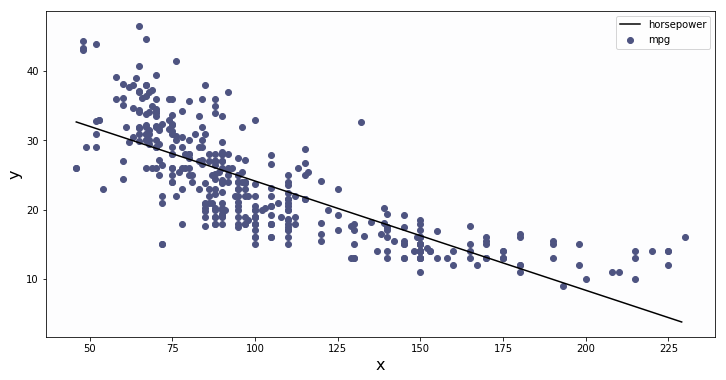

In [8]:
plot_line_noisy(var=1)

We can clearly see that the relationship is negative, since the variables (MPG and horsepower) move in opposite directions. 

**Part 2**: Now I will find a 95% confidence interval for the slope parameter.  

In [9]:
#list comprehension for SSE:
SSE = [(dfAuto["mpg"][i] - (ahat+bhat*(dfAuto["horsepower"][i])))**2 for i in range(dfAuto.shape[0])]
SSE = np.array(SSE).sum()

In [10]:
bhat = bhat
t_alpha = stats.t.ppf(0.975,(dfAuto.shape[0]-2)) #.05/2, but get postive end graph

sigma = np.sqrt((SSE/(dfAuto.shape[0]-2)))
xbar = dfAuto["horsepower"].mean()
denom = [(dfAuto["horsepower"][i]-xbar)**2 for i in range(dfAuto.shape[0])]
denom = np.array(denom).sum()
denom = np.sqrt(denom)

SEBetahat = sigma/denom

In [11]:
ciupper = bhat + t_alpha*(SEBetahat)
cilower = bhat - t_alpha*(SEBetahat)

print(ciupper)
print(cilower)

-0.14517245824295014
-0.17051700846435683


Since 0 is not within the range of the confidence interval, we can conclude there is a relationship between mpg and horsepower.

**Part 3**: Now I will double-check my result from **Part 2** by performing an equivalent hypothesis test.  

Let $\mu$ be the slope parameter. Then, we have a two-tailed test with hypotheses:

$$
\begin{array}{l}
H_0: \mu = 0  \\
H_1: \mu \neq 0  \\
\end{array}
$$

In order to test the alternative hypothesis, I will:

1. Compute the difference in sample mean and the t-test statistics, $t$
2. Compute the one-sided critical value $t_\alpha = -t_{0.05}$ 
3. Reject or fail to reject $H_0$ 

In [36]:
dif_mean = bhat - 0
t = dif_mean/SEBetahat
print(t_alpha)
print(-t_alpha)
print(t)


1.9660653313
-1.9660653313
-24.4891351603


The t-score is clearly in the rejection region. Therefore, we reject the Null hypothesis that the slope is zero and that the two variables are therefore unrelated. This coclusion agrees with my findings in Part 2.